In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()


In [3]:
chembl = pd.read_csv("ChEMBL/ChEMBL3201.csv", sep=";")

In [4]:
chembl

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL1641653,NaN,NaN,298.38,0.0,4.88,1,CCC(CC)c1cc(/C=C/c2cc(O)cc(O)c2)ccc1O,Activity,'=',...,CHEMBL1641570,1,Scientific Literature,Bioorg Med Chem,2011.0,NaN,NaN,NaN,NaN,1.70
1,CHEMBL4781577,NaN,NaN,359.47,1.0,5.48,5a,CC(=O)Oc1ccc(C(c2ccc(C(C)(C)C)cc2)c2ccccn2)cc1,RUmax,'=',...,CHEMBL4706594,1,Scientific Literature,Eur J Med Chem,2020.0,NaN,Dose = 1.0 microM | TIME = 24.0 hr,NaN,NaN,5.32
2,CHEMBL5398518,NaN,NaN,348.16,0.0,3.83,42-B-7,Cc1ccc([N+](=O)[O-])c2c1NC(c1ccc(Br)cc1)=NO2,EC50,'=',...,CHEMBL5365401,1,Scientific Literature,Bioorg Med Chem Lett,2023.0,NaN,NaN,AGONIST,NaN,3.40
3,CHEMBL3319497,NaN,NaN,274.32,0.0,4.05,6,O=Cc1c(Cc2c[nH]c3ccccc23)[nH]c2ccccc12,EC50,'=',...,CHEMBL3351857,1,Scientific Literature,Bioorg Med Chem Lett,2014.0,CHEMBL3307718,NaN,NaN,NaN,0.27
4,CHEMBL2236110,NaN,NaN,728.85,2.0,8.09,"7, beta-NFQ",CN(C)c1ccc(/N=N/c2ccc(C(=O)NCCOCCOCCOCCOCc3ccc...,FC,'=',...,CHEMBL3045382,1,Scientific Literature,Med Chem Res,2012.0,CHEMBL4106361,NaN,NaN,NaN,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,CHEMBL1276127,INDIRUBIN,2.0,262.27,0.0,2.66,II-6,O=C1Nc2ccccc2/C1=C1/Nc2ccccc2C1=O,EC50,'=',...,CHEMBL5247614,1,Scientific Literature,Eur J Med Chem,2022.0,NaN,TIME = 18.0 hr,ACTIVATOR,NaN,0.20
1112,CHEMBL942,BISACODYL,4.0,361.40,0.0,4.11,BSD,CC(=O)Oc1ccc(C(c2ccc(OC(C)=O)cc2)c2ccccn2)cc1,EC50,'>',...,CHEMBL4706594,1,Scientific Literature,Eur J Med Chem,2020.0,NaN,Dose = 30.0 microM | TIME = 24.0 hr,NaN,NaN,1000.00
1113,CHEMBL311636,"8Z-3,4',5-TRIMETHOXYSTILBENE",NaN,270.33,0.0,3.88,13,COc1ccc(/C=C\c2cc(OC)cc(OC)c2)cc1,Ki,'=',...,CHEMBL3045624,1,Scientific Literature,Med Chem Res,2010.0,NaN,NaN,NaN,NaN,12.00
1114,CHEMBL4285743,NaN,NaN,573.49,2.0,6.47,15,O=C(c1ccc(-c2cccc(NS(=O)(=O)c3ccccc3OC(F)(F)F)...,Activity,'<',...,CHEMBL4400508,1,Scientific Literature,J Med Chem,2019.0,CHEMBL3307718,NaN,NaN,NaN,5.00


In [5]:
chembl.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value', 'V

In [6]:
chembl["Data Validity Comment"].value_counts()

Data Validity Comment
Outside typical range    49
Name: count, dtype: int64

In [7]:
chembl["Action Type"].value_counts()

Action Type
AGONIST       153
ACTIVATOR      14
ANTAGONIST     13
MODULATOR       4
INHIBITOR       2
DEGRADER        2
Name: count, dtype: int64

In [8]:
chembl["Standard Units"].value_counts()

Standard Units
nM    674
%     141
U      12
M       3
uM      1
Name: count, dtype: int64

In [9]:
chembl["Standard Type"].value_counts()

Standard Type
EC50             386
Activity         228
Potency          226
FC                78
RUmax             68
Ki                38
IC50              23
Inhibition        23
Ratio             13
Efficacy          12
Kd                 6
Imax               5
Emax               5
pXC50              2
EC70               1
Ratio EC50         1
Concentration      1
Name: count, dtype: int64

<Axes: xlabel='pChEMBL Value', ylabel='Count'>

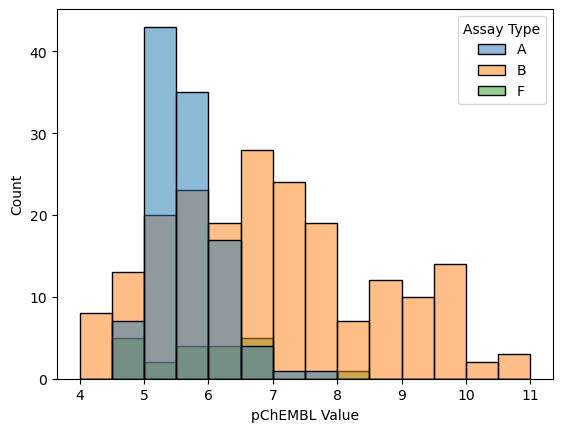

In [10]:
sns.histplot(data=chembl, x="pChEMBL Value", hue="Assay Type")

<Axes: xlabel='Action Type', ylabel='count'>

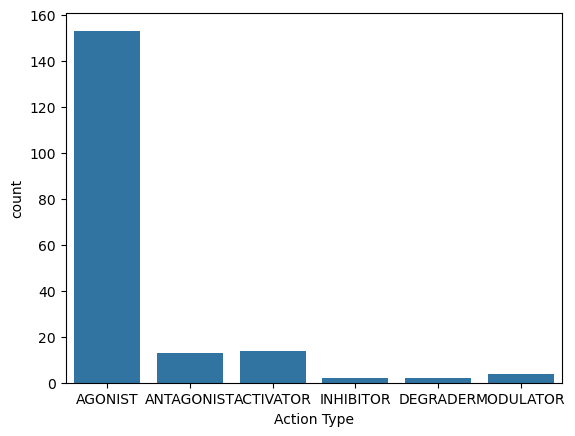

In [11]:
sns.countplot(data=chembl, x="Action Type")

In [12]:
n_mol = chembl["Molecule ChEMBL ID"].nunique()
n_mol

729

In [13]:
n_assays = chembl["Assay ChEMBL ID"].nunique()
n_assays

220

In [14]:

# from Pat Walters method
def standardize_smiles(smiles):
    try:
        # follows the steps in
        # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
        # as described **excellently** (by Greg) in
        # https://www.youtube.com/watch?v=eWTApNX8dJQ
        mol = Chem.MolFromSmiles(smiles)
    
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)
    
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    
        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger()  # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.
    
        te = rdMolStandardize.TautomerEnumerator()  # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    
        return Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    except:
        return pd.NA

In [15]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid

In [16]:

with BlockLogs():
    chembl["CANONICAL_SMILES"] = chembl["Smiles"].progress_apply(lambda x: standardize_smiles(x))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1116/1116 [00:10<00:00, 107.86it/s]


In [17]:
def smi_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToInchiKey(mol)
    except:
        return pd.NA

In [18]:
# compute inchikeys
with BlockLogs():
    chembl["INCHIKEY"] = chembl["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1116/1116 [00:00<00:00, 4193.03it/s]


In [19]:
chembl.INCHIKEY.nunique()

722

In [20]:
chembl.dropna(subset="INCHIKEY", inplace=True)

# select higher quality data

See here for more detail 

https://greglandrum.github.io/rdkit-blog/posts/2023-06-12-overlapping-ic50-assays1.html


## What we will do 

* Select assays with IC50, AC50, pIC50, XC50, EC50, Ki or potency endpoints
* Select assays in nM
* Select assays with more then N molecules (20, 10?)
* Select compounds that appear in more than L of these assays (2, 3 , 5)?

In [21]:
better_assay = chembl[
    (chembl['Standard Type'] == 'IC50') |
    (chembl['Standard Type'] == 'AC50') |
    (chembl['Standard Type'] == 'pIC50') |
    (chembl['Standard Type'] == 'XC50') |
    (chembl['Standard Type'] == 'EC50') | 
    (chembl['Standard Type'] == 'Ki') |
    (chembl['Standard Type'] == 'Potency')
]

In [22]:
better_assay

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY
2,CHEMBL5398518,NaN,NaN,348.16,0.0,3.83,42-B-7,Cc1ccc([N+](=O)[O-])c2c1NC(c1ccc(Br)cc1)=NO2,EC50,'=',...,Scientific Literature,Bioorg Med Chem Lett,2023.0,NaN,NaN,AGONIST,NaN,3.400,Cc1ccc([N+](=O)[O-])c2c1N=C(c1ccc(Br)cc1)NO2,YJBRLBOOAOAIGW-UHFFFAOYSA-N
3,CHEMBL3319497,NaN,NaN,274.32,0.0,4.05,6,O=Cc1c(Cc2c[nH]c3ccccc23)[nH]c2ccccc12,EC50,'=',...,Scientific Literature,Bioorg Med Chem Lett,2014.0,CHEMBL3307718,NaN,NaN,NaN,0.270,O=Cc1c(Cc2c[nH]c3ccccc23)[nH]c2ccccc12,GBEJDLJINBVBFG-UHFFFAOYSA-N
6,CHEMBL600169,NaN,NaN,308.28,0.0,4.89,76,O=c1cc(-c2c(F)cccc2F)oc2ccc3ccccc3c12,EC50,'=',...,Scientific Literature,Bioorg Med Chem,2022.0,NaN,NaN,AGONIST,NaN,0.200,O=c1cc(-c2c(F)cccc2F)oc2ccc3ccccc3c12,OVPIPDBAWBHXGR-UHFFFAOYSA-N
8,CHEMBL3190491,NaN,NaN,271.30,0.0,3.25,SID17504327,Oc1oc(-c2ccccc2)nc1/C=N/c1nccs1,EC50,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,12.291,Oc1oc(-c2ccccc2)nc1C=Nc1nccs1,UGUIPEONHVWAJQ-UHFFFAOYSA-N
9,CHEMBL3194048,NaN,NaN,323.42,0.0,4.12,SID24828847,CCOc1ccc(/C=N/n2cc(-c3ccccc3)nc2S)cc1,EC50,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,4.760,CCOc1ccc(/C=N/n2cc(-c3ccccc3)[nH]c2=S)cc1,GLQOGUNUNKSELM-XDHOZWIPSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,CHEMBL522782,PROCHLORAZ,NaN,376.67,0.0,4.60,VIII-15,CCCN(CCOc1c(Cl)cc(Cl)cc1Cl)C(=O)n1ccnc1,EC50,'=',...,Scientific Literature,Eur J Med Chem,2022.0,NaN,NaN,AGONIST,NaN,1.000,CCCN(CCOc1c(Cl)cc(Cl)cc1Cl)C(=O)n1ccnc1,TVLSRXXIMLFWEO-UHFFFAOYSA-N
1111,CHEMBL1276127,INDIRUBIN,2.0,262.27,0.0,2.66,II-6,O=C1Nc2ccccc2/C1=C1/Nc2ccccc2C1=O,EC50,'=',...,Scientific Literature,Eur J Med Chem,2022.0,NaN,TIME = 18.0 hr,ACTIVATOR,NaN,0.200,O=C1N=c2ccccc2=C1c1[nH]c2ccccc2c1O,VYUIAGTXCYOIMK-UHFFFAOYSA-N
1112,CHEMBL942,BISACODYL,4.0,361.40,0.0,4.11,BSD,CC(=O)Oc1ccc(C(c2ccc(OC(C)=O)cc2)c2ccccn2)cc1,EC50,'>',...,Scientific Literature,Eur J Med Chem,2020.0,NaN,Dose = 30.0 microM | TIME = 24.0 hr,NaN,NaN,1000.000,CC(=O)Oc1ccc(C(c2ccc(OC(C)=O)cc2)c2ccccn2)cc1,KHOITXIGCFIULA-UHFFFAOYSA-N
1113,CHEMBL311636,"8Z-3,4',5-TRIMETHOXYSTILBENE",NaN,270.33,0.0,3.88,13,COc1ccc(/C=C\c2cc(OC)cc(OC)c2)cc1,Ki,'=',...,Scientific Literature,Med Chem Res,2010.0,NaN,NaN,NaN,NaN,12.000,COc1ccc(/C=C\c2cc(OC)cc(OC)c2)cc1,GDHNBPHYVRHYCC-PLNGDYQASA-N


In [23]:
better_units = better_assay[better_assay['Standard Units'] == "nM"]
better_units

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY
2,CHEMBL5398518,NaN,NaN,348.16,0.0,3.83,42-B-7,Cc1ccc([N+](=O)[O-])c2c1NC(c1ccc(Br)cc1)=NO2,EC50,'=',...,Scientific Literature,Bioorg Med Chem Lett,2023.0,NaN,NaN,AGONIST,NaN,3.400,Cc1ccc([N+](=O)[O-])c2c1N=C(c1ccc(Br)cc1)NO2,YJBRLBOOAOAIGW-UHFFFAOYSA-N
3,CHEMBL3319497,NaN,NaN,274.32,0.0,4.05,6,O=Cc1c(Cc2c[nH]c3ccccc23)[nH]c2ccccc12,EC50,'=',...,Scientific Literature,Bioorg Med Chem Lett,2014.0,CHEMBL3307718,NaN,NaN,NaN,0.270,O=Cc1c(Cc2c[nH]c3ccccc23)[nH]c2ccccc12,GBEJDLJINBVBFG-UHFFFAOYSA-N
6,CHEMBL600169,NaN,NaN,308.28,0.0,4.89,76,O=c1cc(-c2c(F)cccc2F)oc2ccc3ccccc3c12,EC50,'=',...,Scientific Literature,Bioorg Med Chem,2022.0,NaN,NaN,AGONIST,NaN,0.200,O=c1cc(-c2c(F)cccc2F)oc2ccc3ccccc3c12,OVPIPDBAWBHXGR-UHFFFAOYSA-N
8,CHEMBL3190491,NaN,NaN,271.30,0.0,3.25,SID17504327,Oc1oc(-c2ccccc2)nc1/C=N/c1nccs1,EC50,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,12.291,Oc1oc(-c2ccccc2)nc1C=Nc1nccs1,UGUIPEONHVWAJQ-UHFFFAOYSA-N
9,CHEMBL3194048,NaN,NaN,323.42,0.0,4.12,SID24828847,CCOc1ccc(/C=N/n2cc(-c3ccccc3)nc2S)cc1,EC50,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,4.760,CCOc1ccc(/C=N/n2cc(-c3ccccc3)[nH]c2=S)cc1,GLQOGUNUNKSELM-XDHOZWIPSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,CHEMBL522782,PROCHLORAZ,NaN,376.67,0.0,4.60,VIII-15,CCCN(CCOc1c(Cl)cc(Cl)cc1Cl)C(=O)n1ccnc1,EC50,'=',...,Scientific Literature,Eur J Med Chem,2022.0,NaN,NaN,AGONIST,NaN,1.000,CCCN(CCOc1c(Cl)cc(Cl)cc1Cl)C(=O)n1ccnc1,TVLSRXXIMLFWEO-UHFFFAOYSA-N
1111,CHEMBL1276127,INDIRUBIN,2.0,262.27,0.0,2.66,II-6,O=C1Nc2ccccc2/C1=C1/Nc2ccccc2C1=O,EC50,'=',...,Scientific Literature,Eur J Med Chem,2022.0,NaN,TIME = 18.0 hr,ACTIVATOR,NaN,0.200,O=C1N=c2ccccc2=C1c1[nH]c2ccccc2c1O,VYUIAGTXCYOIMK-UHFFFAOYSA-N
1112,CHEMBL942,BISACODYL,4.0,361.40,0.0,4.11,BSD,CC(=O)Oc1ccc(C(c2ccc(OC(C)=O)cc2)c2ccccn2)cc1,EC50,'>',...,Scientific Literature,Eur J Med Chem,2020.0,NaN,Dose = 30.0 microM | TIME = 24.0 hr,NaN,NaN,1000.000,CC(=O)Oc1ccc(C(c2ccc(OC(C)=O)cc2)c2ccccn2)cc1,KHOITXIGCFIULA-UHFFFAOYSA-N
1113,CHEMBL311636,"8Z-3,4',5-TRIMETHOXYSTILBENE",NaN,270.33,0.0,3.88,13,COc1ccc(/C=C\c2cc(OC)cc(OC)c2)cc1,Ki,'=',...,Scientific Literature,Med Chem Res,2010.0,NaN,NaN,NaN,NaN,12.000,COc1ccc(/C=C\c2cc(OC)cc(OC)c2)cc1,GDHNBPHYVRHYCC-PLNGDYQASA-N


In [24]:
num_compounds_per_assay = better_units.groupby("Assay ChEMBL ID")["Molecule ChEMBL ID"].nunique()

In [25]:
num_compounds_per_assay

Assay ChEMBL ID
CHEMBL1068662      9
CHEMBL1614450    126
CHEMBL1786468      7
CHEMBL2114849    188
CHEMBL2395405      1
CHEMBL3055293     24
CHEMBL3056575      6
CHEMBL3365189      9
CHEMBL3592812      1
CHEMBL3825787      4
CHEMBL4057749      2
CHEMBL4178562      1
CHEMBL4324438      1
CHEMBL4324439      1
CHEMBL4324440      1
CHEMBL4324442      1
CHEMBL4416186      1
CHEMBL4617427      2
CHEMBL4711205     29
CHEMBL4711211      1
CHEMBL4711212      1
CHEMBL4738008      2
CHEMBL4738009      2
CHEMBL4738010      2
CHEMBL5121359      2
CHEMBL5153997      1
CHEMBL5153999      1
CHEMBL5158491     39
CHEMBL5164481      3
CHEMBL5231427      1
CHEMBL5250021      7
CHEMBL5250022      3
CHEMBL5250024      2
CHEMBL5250025      1
CHEMBL5250027      1
CHEMBL5250030      5
CHEMBL5250031      2
CHEMBL5250035      1
CHEMBL5252490      6
CHEMBL5260511      6
CHEMBL5303784      1
CHEMBL5303832      1
CHEMBL5365762     35
CHEMBL649365      73
CHEMBL651157       1
CHEMBL867900       9
CHEMBL926264      

In [26]:
num_compounds_per_assay_df = pd.DataFrame(num_compounds_per_assay)
num_compounds_per_assay_df.rename(columns={"Molecule ChEMBL ID": "molecule_count"}, inplace=True)
num_compounds_per_assay_df

,molecule_count
Assay ChEMBL ID,
CHEMBL1068662,9
CHEMBL1614450,126
CHEMBL1786468,7
CHEMBL2114849,188
CHEMBL2395405,1
CHEMBL3055293,24
CHEMBL3056575,6
CHEMBL3365189,9
CHEMBL3592812,1


In [27]:
combined = better_units.join(num_compounds_per_assay_df, on="Assay ChEMBL ID")
combined["molecule_count"].unique()

array([ 35,   9,   2, 126,  73,   7, 188,   6,   4,   3,   1,  29,  24,
        39,   5])

In [28]:
N = 10 # assays must have more than N compounds in them 

In [29]:
more_than_N_compounds = combined[combined["molecule_count"] > N]  

In [30]:
more_than_N_compounds

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY,molecule_count
2,CHEMBL5398518,NaN,NaN,348.16,0.0,3.83,42-B-7,Cc1ccc([N+](=O)[O-])c2c1NC(c1ccc(Br)cc1)=NO2,EC50,'=',...,Bioorg Med Chem Lett,2023.0,NaN,NaN,AGONIST,NaN,3.4000,Cc1ccc([N+](=O)[O-])c2c1N=C(c1ccc(Br)cc1)NO2,YJBRLBOOAOAIGW-UHFFFAOYSA-N,35
8,CHEMBL3190491,NaN,NaN,271.30,0.0,3.25,SID17504327,Oc1oc(-c2ccccc2)nc1/C=N/c1nccs1,EC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,12.2910,Oc1oc(-c2ccccc2)nc1C=Nc1nccs1,UGUIPEONHVWAJQ-UHFFFAOYSA-N,126
9,CHEMBL3194048,NaN,NaN,323.42,0.0,4.12,SID24828847,CCOc1ccc(/C=N/n2cc(-c3ccccc3)nc2S)cc1,EC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,4.7600,CCOc1ccc(/C=N/n2cc(-c3ccccc3)[nH]c2=S)cc1,GLQOGUNUNKSELM-XDHOZWIPSA-N,126
10,CHEMBL1605416,NaN,NaN,383.46,0.0,2.68,SID24824213,Cc1csc(NC(=O)CSc2ccc3nnc(-c4ccncc4)n3n2)n1,EC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,12.0340,Cc1csc(NC(=O)CSc2ccc3nnc(-c4ccncc4)n3n2)n1,TYSJDLJCTIMZDZ-UHFFFAOYSA-N,126
11,CHEMBL1300615,NaN,NaN,293.33,0.0,3.28,SID847530,CCOc1ccccc1NC(=O)c1ccc2nccnc2c1,EC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,2.2080,CCOc1ccccc1NC(=O)c1ccc2nccnc2c1,SPGIPWBECXTSSO-UHFFFAOYSA-N,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,CHEMBL1446372,NaN,NaN,123.15,0.0,1.28,SID17389225,Cc1ccc(N)cc1O,Potency,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,44.6684,Cc1ccc(N)cc1O,DBFYESDCPWWCHN-UHFFFAOYSA-N,188
1100,CHEMBL150,KAEMPFEROL,NaN,286.24,0.0,2.28,SID17389844,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,Potency,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.2341,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,IYRMWMYZSQPJKC-UHFFFAOYSA-N,188
1102,CHEMBL1324314,NaN,NaN,259.18,0.0,2.21,SID26757086,Cl.Cl.NCCNc1cccc2ccccc12,Potency,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39.8107,NCCNc1cccc2ccccc12,NULAJYZBOLVQPQ-UHFFFAOYSA-N,188
1103,CHEMBL1231667,CARBOXIN,NaN,235.31,0.0,2.62,SID26752286,CC1=C(C(=O)Nc2ccccc2)SCCO1,Potency,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,50.1187,CC1=C(C(=O)Nc2ccccc2)SCCO1,GYSSRZJIHXQEHQ-UHFFFAOYSA-N,188


In [31]:
more_than_N_compounds.INCHIKEY = more_than_N_compounds.INCHIKEY.astype(str)

/tmp/ipykernel_105042/3449044069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_than_N_compounds.INCHIKEY = more_than_N_compounds.INCHIKEY.astype(str)


<Axes: xlabel='pChEMBL Value', ylabel='Count'>

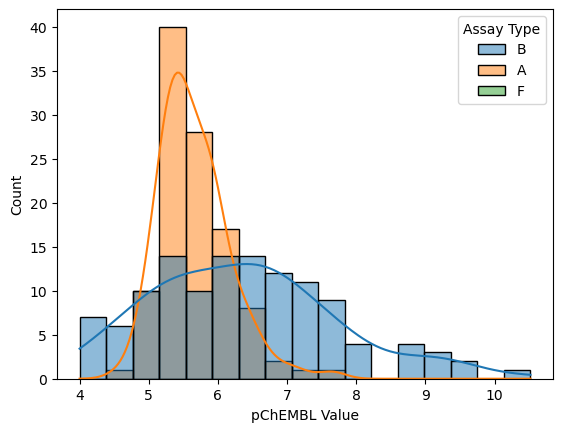

In [32]:
sns.histplot(data=more_than_N_compounds, x="pChEMBL Value", hue="Assay Type", kde=True)

<Axes: xlabel='Molecular Weight', ylabel='Count'>

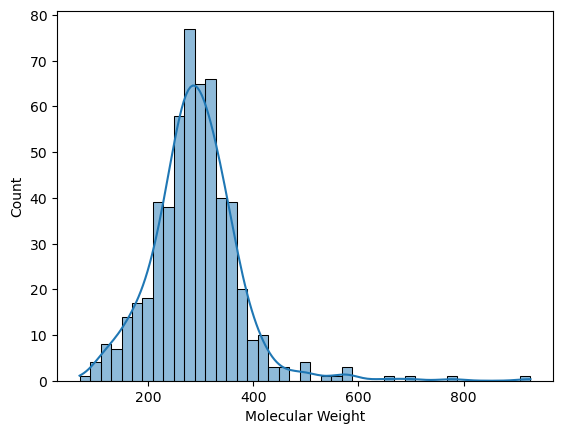

In [33]:
sns.histplot(data=more_than_N_compounds, x="Molecular Weight",  kde=True)

In [34]:
assays = more_than_N_compounds["Assay ChEMBL ID"].nunique()

In [35]:
assays

7

In [36]:
more_than_N_compounds["Molecule ChEMBL ID"].nunique()

513

In [37]:
num_assays_per_compound_df = more_than_N_compounds.groupby(["INCHIKEY"])["Assay ChEMBL ID"].size().reset_index(name="assay_count")
num_assays_per_compound_df = num_assays_per_compound_df.set_index("INCHIKEY")
num_assays_per_compound_df

,assay_count
INCHIKEY,
ACPMLJLQLGEKHV-UHFFFAOYSA-N,1
AGPTXRLVBIRYLV-UHFFFAOYSA-N,1
AGWCBNJDPXUGEN-UHFFFAOYSA-N,1
AHXGXXJEEHFHDK-UHFFFAOYSA-N,1
AISCLLWJTMIDPD-OWOJBTEDSA-N,1
...,...
ZQSIJRDFPHDXIC-UHFFFAOYSA-N,2
ZRWPUFFVAOMMNM-UHFFFAOYSA-N,1
ZSIZNEVHVVRPFF-UHFFFAOYSA-N,1


<Axes: xlabel='assay_count', ylabel='count'>

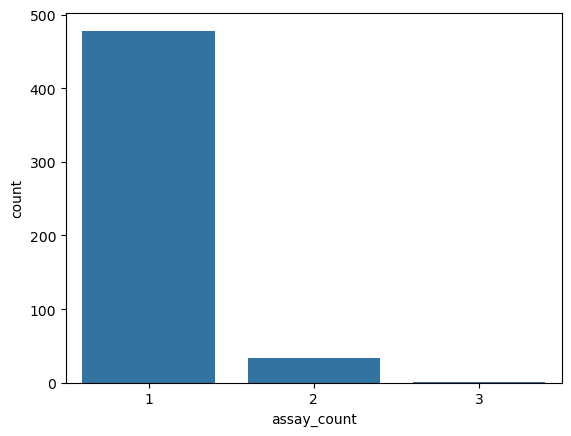

In [38]:
sns.countplot(data=num_assays_per_compound_df, x="assay_count")

In [39]:
combined_2 = more_than_N_compounds.join(num_assays_per_compound_df, on="INCHIKEY")


In [40]:
combined_2.sort_values("assay_count", ascending=False, inplace=True)
combined_2["assay_count"] = combined_2["assay_count"].astype(int)

# Aggregate activity

In [41]:
compound_grouped_mean = combined_2.groupby("INCHIKEY")["pChEMBL Value"].mean()
compound_grouped_mean.reset_index()

,INCHIKEY,pChEMBL Value
0,ACPMLJLQLGEKHV-UHFFFAOYSA-N,5.35
1,AGPTXRLVBIRYLV-UHFFFAOYSA-N,5.36
2,AGWCBNJDPXUGEN-UHFFFAOYSA-N,5.42
3,AHXGXXJEEHFHDK-UHFFFAOYSA-N,NaN
4,AISCLLWJTMIDPD-OWOJBTEDSA-N,NaN
...,...,...
508,ZQSIJRDFPHDXIC-UHFFFAOYSA-N,NaN
509,ZRWPUFFVAOMMNM-UHFFFAOYSA-N,NaN
510,ZSIZNEVHVVRPFF-UHFFFAOYSA-N,7.15
511,ZWIMHUHGTFSTQE-UHFFFAOYSA-N,8.02


<Axes: xlabel='pChEMBL mean', ylabel='Count'>

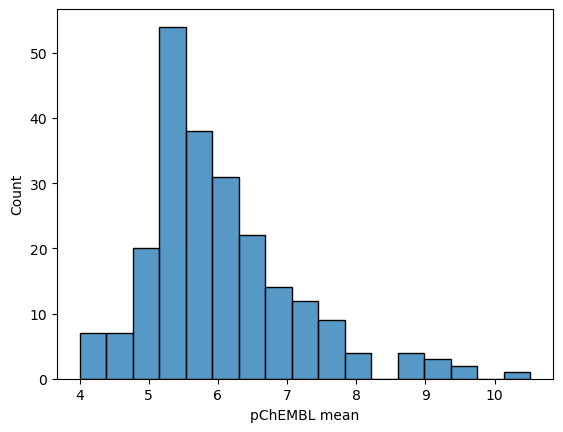

In [42]:
sns.histplot(data=compound_grouped_mean.reset_index(name="pChEMBL mean"),x="pChEMBL mean")

In [43]:
# join 
cgm = compound_grouped_mean.reset_index(name="pChEMBL mean")
cgm = cgm.set_index("INCHIKEY")
combined_3 = combined_2.join(cgm, on="INCHIKEY")


In [44]:
compound_grouped_std = combined_2.groupby("INCHIKEY")["pChEMBL Value"].std()
compound_grouped_std.reset_index()

,INCHIKEY,pChEMBL Value
0,ACPMLJLQLGEKHV-UHFFFAOYSA-N,NaN
1,AGPTXRLVBIRYLV-UHFFFAOYSA-N,NaN
2,AGWCBNJDPXUGEN-UHFFFAOYSA-N,NaN
3,AHXGXXJEEHFHDK-UHFFFAOYSA-N,NaN
4,AISCLLWJTMIDPD-OWOJBTEDSA-N,NaN
...,...,...
508,ZQSIJRDFPHDXIC-UHFFFAOYSA-N,NaN
509,ZRWPUFFVAOMMNM-UHFFFAOYSA-N,NaN
510,ZSIZNEVHVVRPFF-UHFFFAOYSA-N,NaN
511,ZWIMHUHGTFSTQE-UHFFFAOYSA-N,NaN


<Axes: xlabel='pChEMBL stdev', ylabel='Count'>

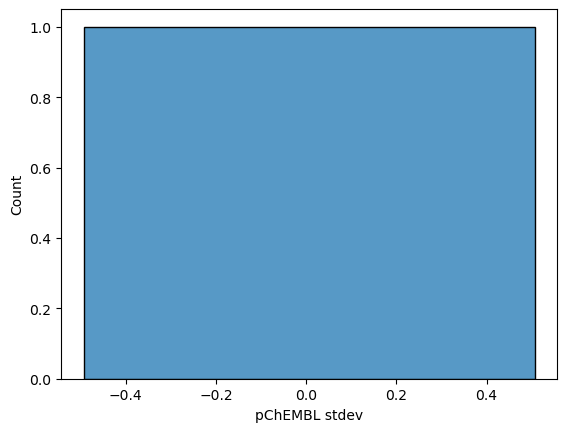

In [45]:
sns.histplot(data=compound_grouped_std.reset_index(name="pChEMBL stdev"),x="pChEMBL stdev")

In [46]:
cgstd = compound_grouped_std.reset_index(name="pChEMBL std")
cgstd = cgstd.set_index("INCHIKEY")
combined_4 =  combined_3.join(cgstd, on="INCHIKEY")

In [47]:
combined_4

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY,molecule_count,assay_count,pChEMBL mean,pChEMBL std
992,CHEMBL463210,CHLORPYRIFOS,-1.0,350.59,0.0,4.72,SID17389921,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,Potency,NaN,...,NaN,NaN,NaN,19.9526,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,SBPBAQFWLVIOKP-UHFFFAOYSA-N,188,3,NaN,NaN
1093,CHEMBL463210,CHLORPYRIFOS,-1.0,350.59,0.0,4.72,SID26753019,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,Potency,NaN,...,NaN,NaN,NaN,50.1187,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,SBPBAQFWLVIOKP-UHFFFAOYSA-N,188,3,NaN,NaN
923,CHEMBL463210,CHLORPYRIFOS,-1.0,350.59,0.0,4.72,SID26753020,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,Potency,NaN,...,NaN,NaN,NaN,44.6684,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,SBPBAQFWLVIOKP-UHFFFAOYSA-N,188,3,NaN,NaN
993,CHEMBL625,THIABENDAZOLE,4.0,201.25,0.0,2.69,SID17389714,c1ccc2[nH]c(-c3cscn3)nc2c1,Potency,NaN,...,NaN,NaN,NaN,12.5893,c1ccc2[nH]c(-c3cscn3)nc2c1,WJCNZQLZVWNLKY-UHFFFAOYSA-N,188,2,NaN,NaN
996,CHEMBL84685,NaN,NaN,223.23,0.0,2.04,SID26753072,Nc1ccc2c(c1)C(=O)c1ccccc1C2=O,Potency,NaN,...,NaN,NaN,NaN,44.6684,Nc1ccc2c(c1)C(=O)c1ccccc1C2=O,XOGPDSATLSAZEK-UHFFFAOYSA-N,188,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,CHEMBL1402878,NaN,NaN,386.23,1.0,5.46,SID17432651,O=C(Nc1ccccc1OC(=O)c1ccc(Cl)cc1)c1ccc(Cl)cc1,EC50,'=',...,NaN,NaN,NaN,4.8900,O=C(Nc1ccccc1OC(=O)c1ccc(Cl)cc1)c1ccc(Cl)cc1,KDSBZHUJTOUSRK-UHFFFAOYSA-N,126,1,5.31,NaN
409,CHEMBL14328,NaN,NaN,291.99,1.0,5.97,72,Clc1cc(-c2ccccc2)c(Cl)c(Cl)c1Cl,EC50,'=',...,NaN,NaN,NaN,3.8540,Clc1cc(-c2ccccc2)c(Cl)c(Cl)c1Cl,HLQDGCWIOSOMDP-UHFFFAOYSA-N,73,1,NaN,NaN
411,CHEMBL342696,POLYCHLORINATED BIPHENYL 126,NaN,326.44,1.0,6.62,62,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2)cc1Cl,EC50,'=',...,NaN,NaN,NaN,6.8860,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2)cc1Cl,REHONNLQRWTIFF-UHFFFAOYSA-N,73,1,6.89,NaN
421,CHEMBL1319813,NaN,NaN,162.02,0.0,2.58,SID17389626,Nc1ccc(Cl)c(Cl)c1,Potency,NaN,...,NaN,NaN,NaN,56.2341,Nc1ccc(Cl)c(Cl)c1,SDYWXFYBZPNOFX-UHFFFAOYSA-N,188,1,NaN,NaN


In [48]:
combined_4.INCHIKEY.nunique()

513

# Calibration of thresholds for activity and stdev?

## variablitiy

We could subselect for inter-assay variability, but we should probably do a more in depth study into this. 

We would need to select ASSAYs that are outliers and drop them rather than dropping compounds most likely. 

Lets leave it for now. 

## activity

Lets take compounds with pChEMBL >= 5.0 (XC50 = 10 um)


In [49]:
pchembl_thresh = 5.0 
active = combined_4[combined_4["pChEMBL mean"] >= pchembl_thresh]

In [50]:
# now clean up 
keep_cols = ["CANONICAL_SMILES", "INCHIKEY", "pChEMBL mean", "pChEMBL std", "Molecule Name", "assay_count", "Action Type"]

In [51]:
clean_active = active[keep_cols]
clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)
clean_active_sorted = clean_active.sort_values(["common_name", "action_type"], ascending=[False, False]) # keep the ones with names if possible
clean_deduped = clean_active_sorted.drop_duplicates(subset="INCHIKEY", keep="first")
clean_deduped = clean_deduped.sort_values("appears_in_N_ChEMBL_assays", ascending=False)


/tmp/ipykernel_105042/1579042175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)


In [52]:
clean_active.head()

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type
1002,CC(C)c1c(O)cc(/C=C/c2ccccc2)cc1O,ZISJNXNHJRQYJO-CMDGGOBGSA-N,7.565,0.007071,TAPINAROF,2,AGONIST
609,CC(C)c1c(O)cc(/C=C/c2ccccc2)cc1O,ZISJNXNHJRQYJO-CMDGGOBGSA-N,7.565,0.007071,TAPINAROF,2,AGONIST
847,Brc1ccc(-c2nc3c(Br)cccn3n2)cc1,NNHYXGVMDQBFBD-UHFFFAOYSA-N,6.760,NaN,NaN,1,AGONIST
784,Clc1ccc(-c2nc3ccc(Br)cn3n2)cc1,ZBAAGPPMCVKTFM-UHFFFAOYSA-N,9.080,NaN,NaN,1,AGONIST
785,Brc1ccc2nc(-c3ccccc3Br)nn2c1,XRYLOVUFSCWBPU-UHFFFAOYSA-N,5.610,NaN,NaN,1,AGONIST


In [53]:
clean_deduped["action_type"].value_counts()

action_type
AGONIST    48
Name: count, dtype: int64

In [54]:
clean_deduped["action_type"] = clean_deduped["action_type"].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [55]:
clean_deduped["action_type"].value_counts()

action_type
agonist    48
Name: count, dtype: int64

In [56]:
clean_deduped["dataset"] = "ChEMBL_curated"
clean_deduped["active"] = True

<Axes: xlabel='pChEMBL mean', ylabel='Count'>

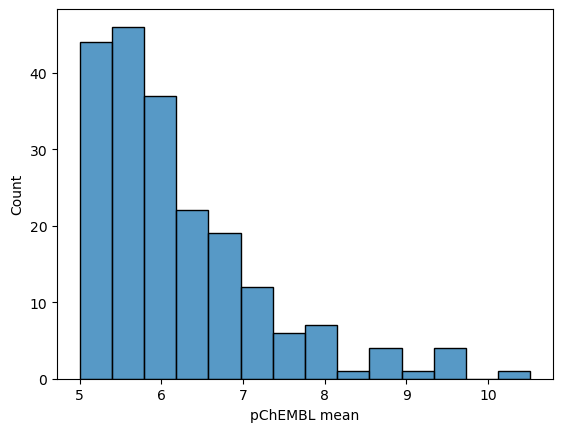

In [57]:
sns.histplot(data=clean_deduped, x="pChEMBL mean")

In [58]:
clean_deduped.to_csv("processed/chembl_active.csv", index=False)

# Subselect by number of assay appearances

In [59]:
L = 1 # compounds must appear in L or more assays

In [60]:


more_than_eq_L_assay = clean_deduped[clean_deduped["appears_in_N_ChEMBL_assays"] >= L]
more_than_eq_L_assay

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
1002,CC(C)c1c(O)cc(/C=C/c2ccccc2)cc1O,ZISJNXNHJRQYJO-CMDGGOBGSA-N,7.565,0.007071,TAPINAROF,2,agonist,ChEMBL_curated,True
411,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2)cc1Cl,REHONNLQRWTIFF-UHFFFAOYSA-N,6.890,NaN,POLYCHLORINATED BIPHENYL 126,1,NaN,ChEMBL_curated,True
777,Clc1cc2c(cc1Cl)Oc1cc(Cl)c(Cl)cc1O2,HGUFODBRKLSHSI-UHFFFAOYSA-N,8.000,NaN,"2,3,7,8-TETRACHLORODIBENZO-P-DIOXIN",1,NaN,ChEMBL_curated,True
847,Brc1ccc(-c2nc3c(Br)cccn3n2)cc1,NNHYXGVMDQBFBD-UHFFFAOYSA-N,6.760,NaN,NaN,1,agonist,ChEMBL_curated,True
784,Clc1ccc(-c2nc3ccc(Br)cn3n2)cc1,ZBAAGPPMCVKTFM-UHFFFAOYSA-N,9.080,NaN,NaN,1,agonist,ChEMBL_curated,True
...,...,...,...,...,...,...,...,...,...
396,CCOc1ccc(NC(=O)c2cc3ccccc3cc2OC)cc1,RHGZQBLFVXMWLY-UHFFFAOYSA-N,5.660,NaN,NaN,1,NaN,ChEMBL_curated,True
397,O=C(NC1CCCC1)c1cc2c(ccc3ccccc32)o1,VPROQYQBNVRYST-UHFFFAOYSA-N,5.550,NaN,NaN,1,NaN,ChEMBL_curated,True
403,O=[N+]([O-])c1cnc(Nc2ccc(Cl)cn2)c([N+](=O)[O-])c1,LFQZRGHJOLHCGV-UHFFFAOYSA-N,5.890,NaN,NaN,1,NaN,ChEMBL_curated,True
404,O=C(Nc1ccccc1OC(=O)c1ccc(Cl)cc1)c1ccc(Cl)cc1,KDSBZHUJTOUSRK-UHFFFAOYSA-N,5.310,NaN,NaN,1,NaN,ChEMBL_curated,True


In [61]:
more_than_eq_L_assay.INCHIKEY.nunique()

204

<Axes: xlabel='appears_in_N_ChEMBL_assays', ylabel='count'>

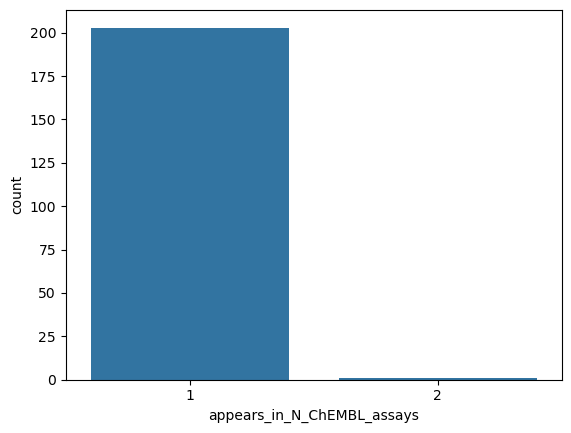

In [62]:
sns.countplot(data=more_than_eq_L_assay, x="appears_in_N_ChEMBL_assays")

<Axes: xlabel='pChEMBL mean', ylabel='Count'>

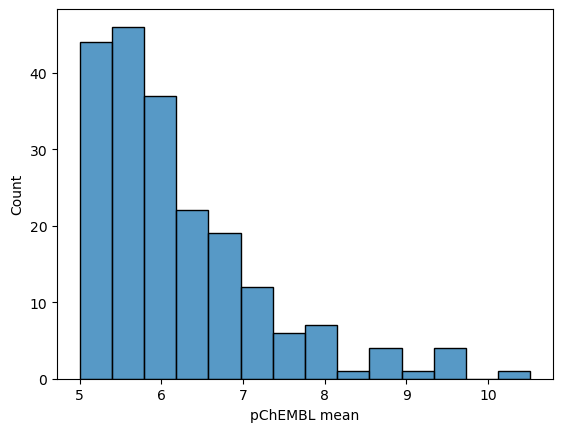

In [63]:
sns.histplot(data=more_than_eq_L_assay, x="pChEMBL mean")

In [64]:
more_than_eq_L_assay

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
1002,CC(C)c1c(O)cc(/C=C/c2ccccc2)cc1O,ZISJNXNHJRQYJO-CMDGGOBGSA-N,7.565,0.007071,TAPINAROF,2,agonist,ChEMBL_curated,True
411,Clc1ccc(-c2cc(Cl)c(Cl)c(Cl)c2)cc1Cl,REHONNLQRWTIFF-UHFFFAOYSA-N,6.890,NaN,POLYCHLORINATED BIPHENYL 126,1,NaN,ChEMBL_curated,True
777,Clc1cc2c(cc1Cl)Oc1cc(Cl)c(Cl)cc1O2,HGUFODBRKLSHSI-UHFFFAOYSA-N,8.000,NaN,"2,3,7,8-TETRACHLORODIBENZO-P-DIOXIN",1,NaN,ChEMBL_curated,True
847,Brc1ccc(-c2nc3c(Br)cccn3n2)cc1,NNHYXGVMDQBFBD-UHFFFAOYSA-N,6.760,NaN,NaN,1,agonist,ChEMBL_curated,True
784,Clc1ccc(-c2nc3ccc(Br)cn3n2)cc1,ZBAAGPPMCVKTFM-UHFFFAOYSA-N,9.080,NaN,NaN,1,agonist,ChEMBL_curated,True
...,...,...,...,...,...,...,...,...,...
396,CCOc1ccc(NC(=O)c2cc3ccccc3cc2OC)cc1,RHGZQBLFVXMWLY-UHFFFAOYSA-N,5.660,NaN,NaN,1,NaN,ChEMBL_curated,True
397,O=C(NC1CCCC1)c1cc2c(ccc3ccccc32)o1,VPROQYQBNVRYST-UHFFFAOYSA-N,5.550,NaN,NaN,1,NaN,ChEMBL_curated,True
403,O=[N+]([O-])c1cnc(Nc2ccc(Cl)cn2)c([N+](=O)[O-])c1,LFQZRGHJOLHCGV-UHFFFAOYSA-N,5.890,NaN,NaN,1,NaN,ChEMBL_curated,True
404,O=C(Nc1ccccc1OC(=O)c1ccc(Cl)cc1)c1ccc(Cl)cc1,KDSBZHUJTOUSRK-UHFFFAOYSA-N,5.310,NaN,NaN,1,NaN,ChEMBL_curated,True


In [65]:
more_than_eq_L_assay["common_name"].value_counts()

common_name
TAPINAROF                              1
POLYCHLORINATED BIPHENYL 126           1
2,3,7,8-TETRACHLORODIBENZO-P-DIOXIN    1
Name: count, dtype: int64

In [66]:
more_than_eq_L_assay.to_csv("processed/chembl_active_selected.csv", index=False)

In [67]:
more_than_eq_L_assay.action_type.value_counts()

action_type
agonist    48
Name: count, dtype: int64